<a href="https://colab.research.google.com/github/iterat1on/project/blob/main/space_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
from google.colab import drive
drive.mount("/content/drive/")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'iterat1on'
os.environ['KAGGLE_KEY'] = 'db47c3f2d0dc3f9fc2d6272e92bf4859'

In [4]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 110MB/s]


In [5]:
! unzip -qq /content/spaceship-titanic.zip

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df_test = pd.read_csv("/content/test.csv")
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### 결측치 체크

In [10]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### 타켓 분포 확인

In [11]:
y = df.Transported

In [12]:
y.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [13]:
def pre(df):
    df[['deck','num', 'side']] = df['Cabin'].str.split('/', expand=True)
    df[['deck','num', 'side']] = df[['deck','num', 'side']].fillna(method = 'ffill')
    df = df.drop(["Name", "Cabin", "num", 'PassengerId', 'Name', 'Cabin'], axis = 1)
    df["deck"].replace({"T":"F"},inplace=True)
    return df

In [14]:
df = pre(df)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


### 불균형한 T 제거 F로 대체 -> 갯수 너무 적음 10개 미만

In [15]:
print(df["deck"].value_counts(), "\n", df["side"].value_counts())

F    2852
G    2626
E     897
B     803
C     764
D     485
A     266
Name: deck, dtype: int64 
 S    4376
P    4317
Name: side, dtype: int64


In [16]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
deck              0
side              0
dtype: int64

In [17]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


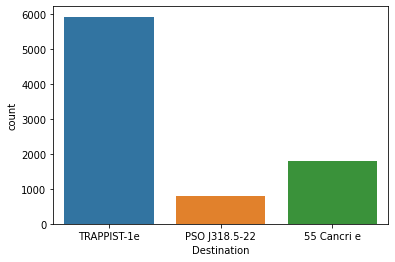

In [18]:
sns.countplot(df.Destination);

오버 샘플링 고려


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  deck          8693 non-null   object 
 12  side          8693 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [20]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'deck',
       'side'],
      dtype='object')

In [21]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


## 범주형 변수 분포확인

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


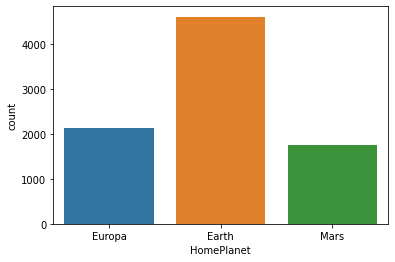

In [22]:
sns.countplot(df.HomePlanet);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


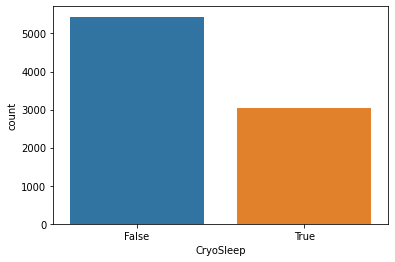

In [23]:
sns.countplot(df.CryoSleep)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


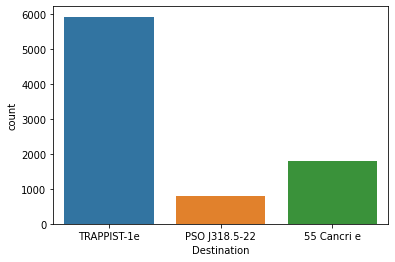

In [24]:
sns.countplot(df.Destination)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


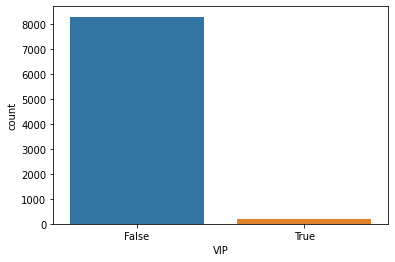

In [25]:
sns.countplot(df.VIP);

## 수치형 변수 분포확인

In [26]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


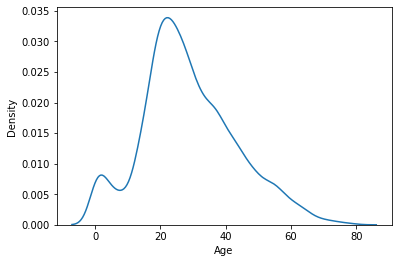

In [27]:
sns.kdeplot(df.Age)

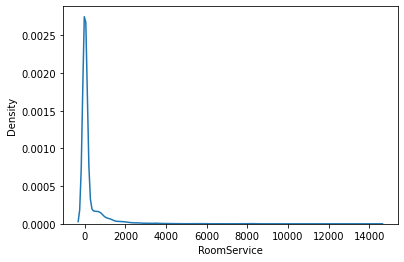

In [28]:
sns.kdeplot(df.RoomService)

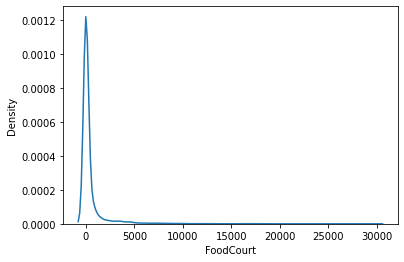

In [29]:
sns.kdeplot(df.FoodCourt)

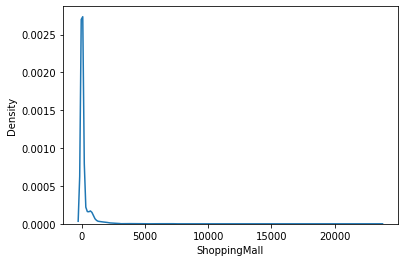

In [30]:
sns.kdeplot(df.ShoppingMall)

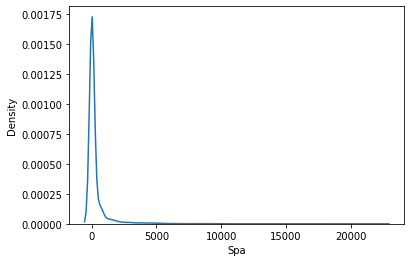

In [31]:
sns.kdeplot(df.Spa)

### 연령을 제외하고는 결측치 0으로 채움

In [32]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S


In [33]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'deck',
       'side'],
      dtype='object')

In [34]:
def f_na(df):
    df[['RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
    return df

In [35]:
df = f_na(df)
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
deck              0
side              0
dtype: int64

### 범주형 변수 결측치 처리

Destination, VIP는 비율 차이가 많이 나서 가장 많은 값으로 채우고
나머지 항목은 ffill로 처리

In [36]:
def f_na2(df):
    df[["HomePlanet", "CryoSleep"]] = df[["HomePlanet", "CryoSleep"]].fillna(method = "ffill", axis = 0)
    most_des = df["Destination"].value_counts().idxmax()
    most_vip = df["VIP"].value_counts().idxmax()


    df["Destination"] = df["Destination"].fillna(most_des)
    df["VIP"] = df["VIP"].fillna(most_vip)
    return df

In [37]:
df = f_na2(df)
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
deck              0
side              0
dtype: int64

In [38]:
num_col = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for col in df[num_col].columns :
  print(df[col].describe())

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64
count     8693.000000
mean       220.009318
std        660.519050
min          0.000000
25%          0.000000
50%          0.000000
75%         41.000000
max      14327.000000
Name: RoomService, dtype: float64
count     8693.000000
mean       448.434027
std       1595.790627
min          0.000000
25%          0.000000
50%          0.000000
75%         61.000000
max      29813.000000
Name: FoodCourt, dtype: float64
count     8693.000000
mean       169.572300
std        598.007164
min          0.000000
25%          0.000000
50%          0.000000
75%         22.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
count     8693.000000
mean       304.588865
std       1125.562559
min          0.000000
25%          0.000000
50%          0.000000
75%         53.000000
max      22408.000000
N

In [39]:
cat_col = df.columns.difference(num_col).values
cat_col

array(['CryoSleep', 'Destination', 'HomePlanet', 'Transported', 'VIP',
       'deck', 'side'], dtype=object)

In [40]:
print(cat_col,"\n", num_col)

['CryoSleep' 'Destination' 'HomePlanet' 'Transported' 'VIP' 'deck' 'side'] 
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [41]:
df[num_col]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [42]:
df[cat_col]

,CryoSleep,Destination,HomePlanet,Transported,VIP,deck,side
0,False,TRAPPIST-1e,Europa,False,False,B,P
1,False,TRAPPIST-1e,Earth,True,False,F,S
2,False,TRAPPIST-1e,Europa,False,True,A,S
3,False,TRAPPIST-1e,Europa,False,False,A,S
4,False,TRAPPIST-1e,Earth,True,False,F,S
...,...,...,...,...,...,...,...
8688,False,55 Cancri e,Europa,False,True,A,P
8689,True,PSO J318.5-22,Earth,False,False,G,S
8690,False,TRAPPIST-1e,Earth,True,False,G,S
8691,False,55 Cancri e,Europa,False,False,E,S


### 나이 결측치 처리

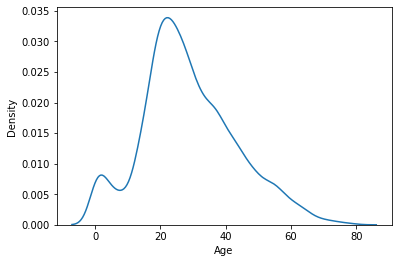

In [43]:
sns.kdeplot(df.Age)

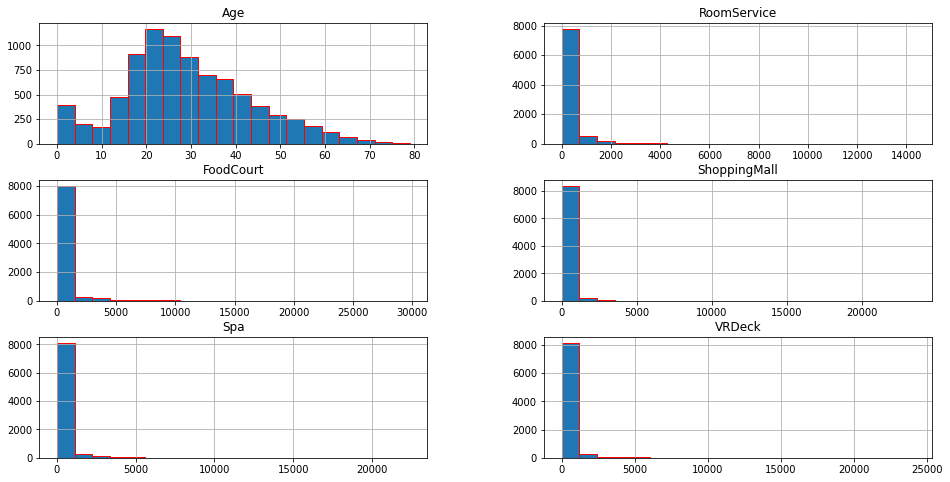

In [44]:
df[num_col].hist(bins=20, figsize=(16,8), edgecolor="r");

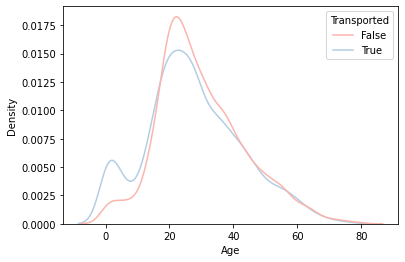

In [45]:
sns.kdeplot(df['Age'],hue=df['Transported'], palette='Pastel1')
plt.show()

In [46]:
df["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [47]:
df["Age"] = df["Age"].fillna(np.mean(df["Age"]))
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
side            0
dtype: int64

In [48]:
from sklearn.preprocessing import power_transform

수치형 변수 스케일링

In [49]:
df[num_col] = power_transform(df[num_col],standardize=False)

yeo-johnson transformation

In [50]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,Europa,False,TRAPPIST-1e,19.894200,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,False,B,P
1,Earth,False,TRAPPIST-1e,13.585521,False,1.956234,1.506156,1.621215,2.283597,1.854236,True,F,S
2,Europa,False,TRAPPIST-1e,27.082224,True,1.819078,2.410341,-0.000000,2.407002,1.873731,False,A,S
3,Europa,False,TRAPPIST-1e,17.457147,False,-0.000000,2.361995,1.918443,2.383863,2.058675,False,A,S
4,Earth,False,TRAPPIST-1e,9.836797,False,2.054959,2.048681,1.857680,2.285831,0.872394,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,20.685754,True,-0.000000,2.432073,-0.000000,2.352933,1.940911,False,A,P
8689,Earth,True,PSO J318.5-22,10.809039,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,False,G,S
8690,Earth,False,TRAPPIST-1e,14.472422,False,-0.000000,-0.000000,1.978610,0.604635,-0.000000,True,G,S
8691,Europa,False,55 Cancri e,17.040908,False,-0.000000,2.349952,-0.000000,2.245819,2.220489,False,E,S


변환이후 데이터 확인

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

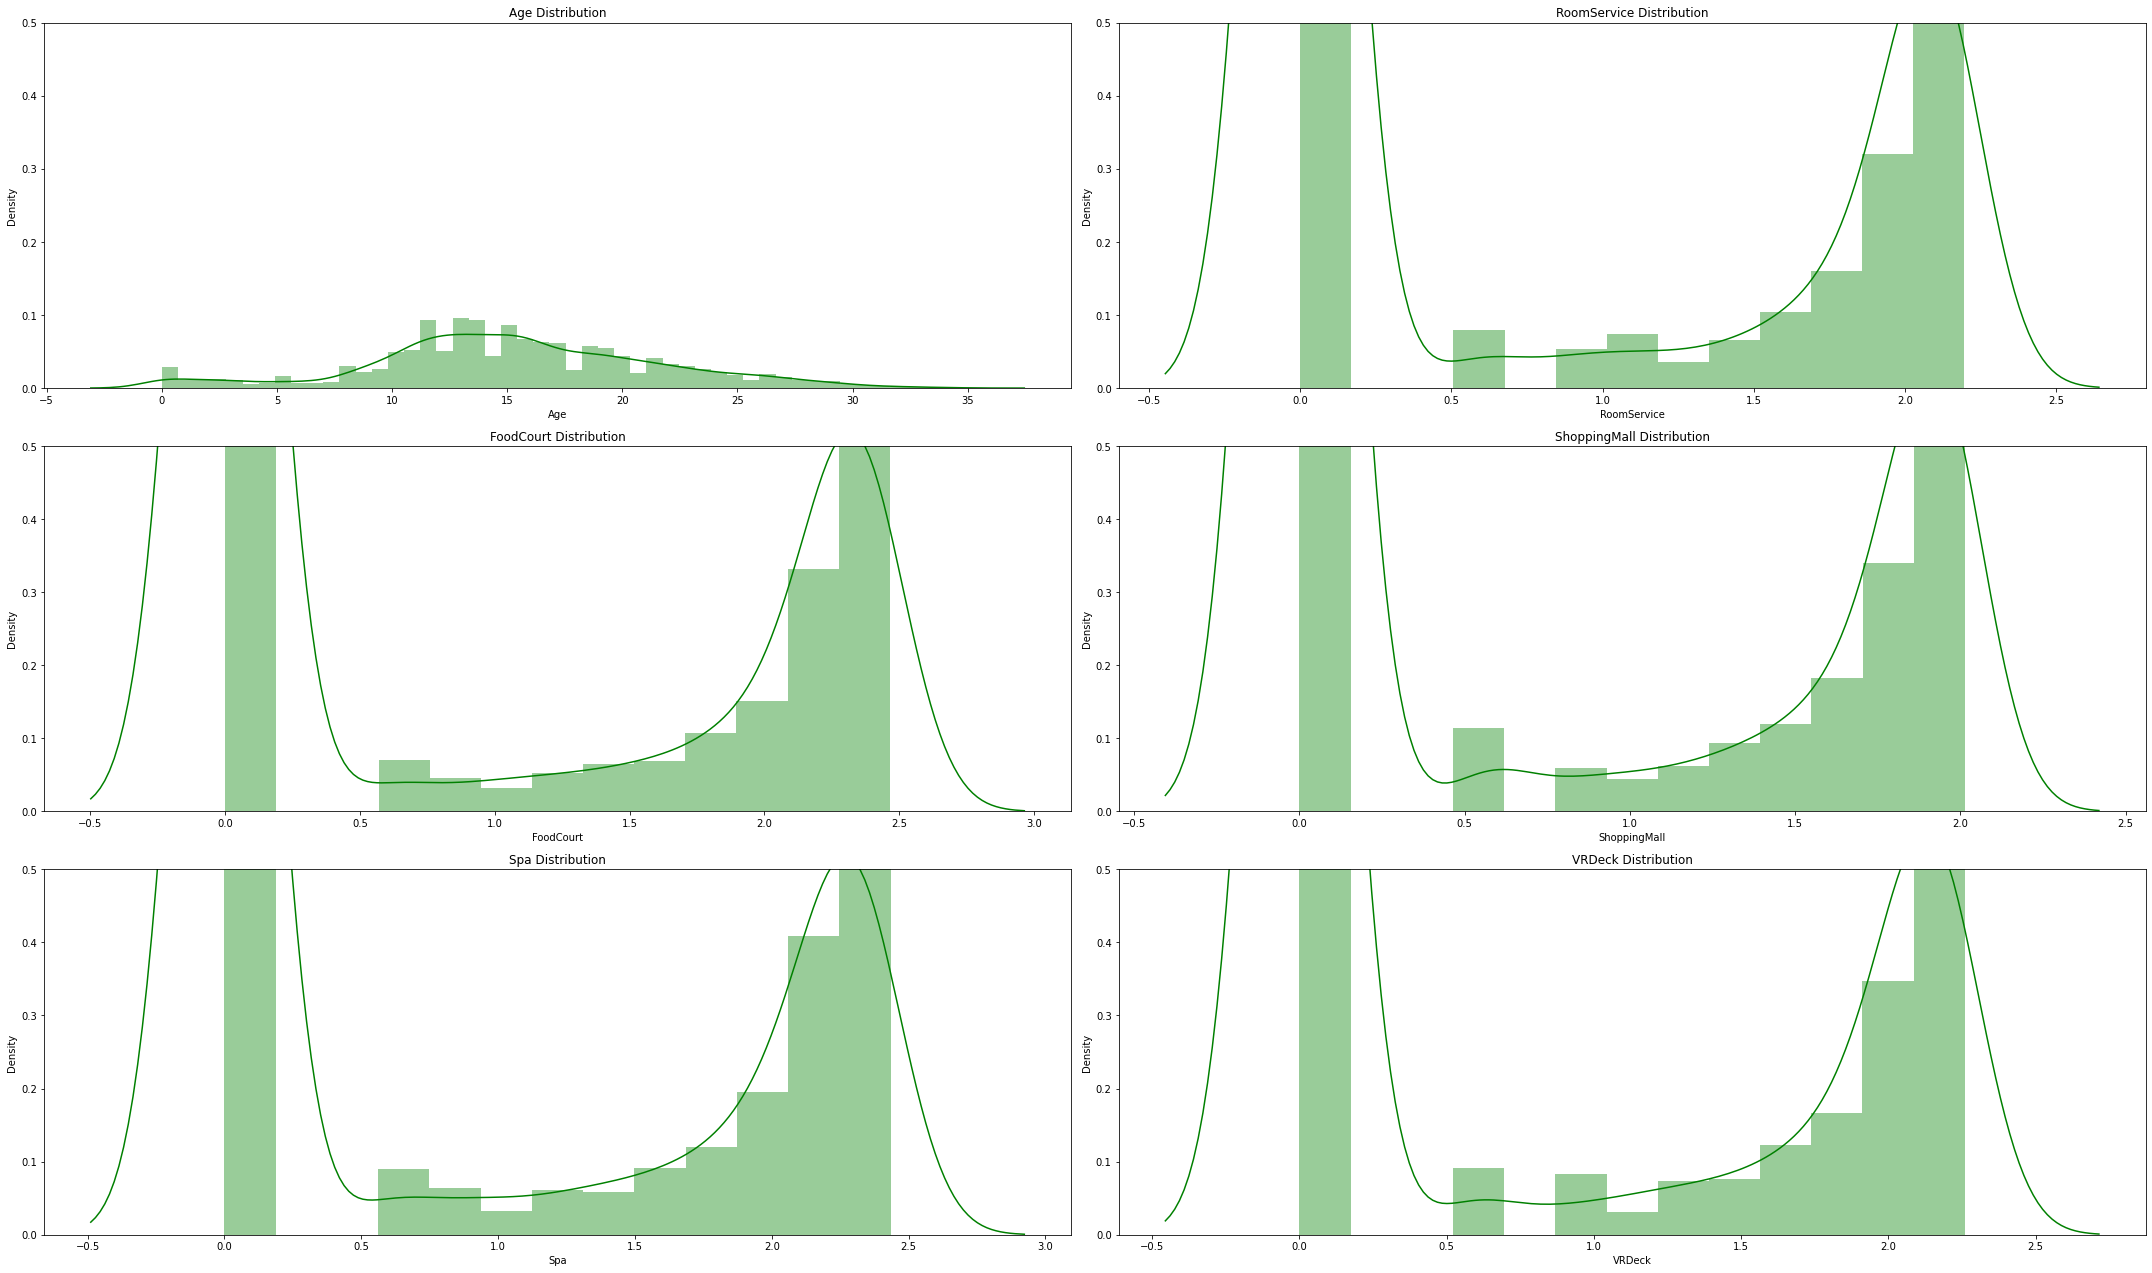

In [51]:
x=1

plt.figure(figsize=(30,35))
for i in num_col:
    plt.subplot(6,2,x)
    sns.distplot(df[i],color="green")
    plt.ylim(0,0.5)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

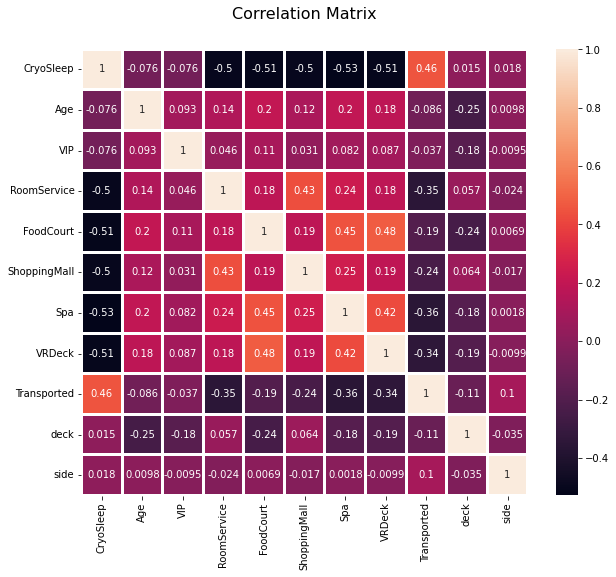

In [84]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df.corr(), square=True, linewidths=2, annot=True, cbar_kws={"shrink": 0.82}
)
plt.title("Correlation Matrix", fontsize=16, pad=30)
plt.show();

## 범주형 라벨 인코딩

In [52]:
cat_col

array(['CryoSleep', 'Destination', 'HomePlanet', 'Transported', 'VIP',
       'deck', 'side'], dtype=object)

In [53]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ['CryoSleep', 'VIP',
       'deck', 'side']

### 테스트 데이터 전처리 적용

In [54]:
df_test = pre(df_test)
df_test = f_na(df_test)
df_test = f_na2(df_test)
df_test["Age"] = df_test["Age"].fillna(np.mean(df_test["Age"]))
df_test[num_col] = power_transform(df_test[num_col],standardize=False)
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side
0,Earth,True,TRAPPIST-1e,14.410244,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,G,S
1,Earth,False,TRAPPIST-1e,10.952902,False,-0.000000,1.496821,-0.000000,2.354215,-0.000000,F,S
2,Europa,True,55 Cancri e,16.037707,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,C,S
3,Europa,False,TRAPPIST-1e,18.762559,False,-0.000000,2.397146,-0.000000,2.157014,2.052248,C,S
4,Earth,False,TRAPPIST-1e,11.402778,False,1.481742,-0.000000,1.982581,-0.000000,-0.000000,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,17.223036,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,G,S
4273,Earth,False,TRAPPIST-1e,20.260802,False,-0.000000,2.306388,1.559712,1.529278,1.948733,G,S
4274,Mars,True,55 Cancri e,15.091890,False,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,D,P
4275,Europa,False,TRAPPIST-1e,15.091890,False,-0.000000,2.366164,-0.000000,-0.000000,2.046191,D,P


In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [56]:
enc = LabelEncoder()

In [57]:
df[ordinal_cat_cols] = df[ordinal_cat_cols].apply(enc.fit_transform)
df_test[ordinal_cat_cols] = df_test[ordinal_cat_cols].apply(enc.fit_transform)

In [58]:
train_df = pd.get_dummies(df,columns=nominal_cat_cols)
test_df = pd.get_dummies(df_test,columns=nominal_cat_cols)
train_df["Transported"].replace({False:0,True:1},inplace=True)

In [59]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,19.894200,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0,1,0,0,1,0,0,0,1
1,0,13.585521,0,1.956234,1.506156,1.621215,2.283597,1.854236,1,5,1,1,0,0,0,0,1
2,0,27.082224,1,1.819078,2.410341,-0.000000,2.407002,1.873731,0,0,1,0,1,0,0,0,1
3,0,17.457147,0,-0.000000,2.361995,1.918443,2.383863,2.058675,0,0,1,0,1,0,0,0,1
4,0,9.836797,0,2.054959,2.048681,1.857680,2.285831,0.872394,1,5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,20.685754,1,-0.000000,2.432073,-0.000000,2.352933,1.940911,0,0,0,0,1,0,1,0,0
8689,1,10.809039,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0,6,1,1,0,0,0,1,0
8690,0,14.472422,0,-0.000000,-0.000000,1.978610,0.604635,-0.000000,1,6,1,1,0,0,0,0,1
8691,0,17.040908,0,-0.000000,2.349952,-0.000000,2.245819,2.220489,0,4,1,0,1,0,1,0,0


In [60]:
test_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,14.410244,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,6,1,1,0,0,0,0,1
1,0,10.952902,0,-0.000000,1.496821,-0.000000,2.354215,-0.000000,5,1,1,0,0,0,0,1
2,1,16.037707,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2,1,0,1,0,1,0,0
3,0,18.762559,0,-0.000000,2.397146,-0.000000,2.157014,2.052248,2,1,0,1,0,0,0,1
4,0,11.402778,0,1.481742,-0.000000,1.982581,-0.000000,-0.000000,5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,17.223036,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,6,1,1,0,0,0,0,1
4273,0,20.260802,0,-0.000000,2.306388,1.559712,1.529278,1.948733,6,1,1,0,0,0,0,1
4274,1,15.091890,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,3,0,0,0,1,1,0,0
4275,0,15.091890,0,-0.000000,2.366164,-0.000000,-0.000000,2.046191,3,0,0,1,0,0,0,1


## Logistic Regression

In [61]:
X = train_df.copy().drop(columns=["Transported"])
y = train_df.copy()[["Transported"]]

In [62]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

1.5 IQR 기준 이상치 많아서 standard scaler 가 아닌 로버스트 사용

In [65]:
from sklearn.preprocessing import RobustScaler

In [68]:
robustScaler = RobustScaler().fit(X_train)

In [69]:
X_train_robust = robustScaler.transform(X_train)
X_test_robust = robustScaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_robust, y_train.values.ravel())

LogisticRegression()

In [77]:
print(lr_model.score(X_train_robust, y_train.values.ravel()))
print(lr_model.score(X_test_robust, y_test.values.ravel()))

0.7557929334428923
0.7461656441717791


standard scaler 테스트

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr_model2 = LogisticRegression()
lr_model2.fit(X_train_st, y_train.values.ravel())
print(lr_model2.score(X_train_st, y_train.values.ravel()))
print(lr_model2.score(X_test_st, y_test.values.ravel()))

0.7552999178307314
0.7461656441717791


### cv

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr_reg = LogisticRegression(random_state=23, max_iter=2000)
lr_reg_scores = cross_val_score(lr_reg, X_train_robust, y_train.values.ravel(), cv=10)
lr_reg_scores

array([0.75205255, 0.75369458, 0.72085386, 0.74712644, 0.76026273,
       0.75164474, 0.77138158, 0.76151316, 0.75822368, 0.76809211])

## GBM

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=23)
gbc_scores = cross_val_score(gbc, X_train_robust, y_train.values.ravel(), cv=10)
gbc_scores

array([0.81116585, 0.80131363, 0.75041051, 0.78489327, 0.79638752,
       0.79934211, 0.81578947, 0.81907895, 0.80263158, 0.78782895])

LGBM

In [108]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=23)
lgbm_scores = cross_val_score(lgbm, X_train_robust, y_train.values.ravel(), cv=10)
lgbm_scores

array([0.79310345, 0.79638752, 0.7635468 , 0.79967159, 0.78981938,
       0.82565789, 0.79605263, 0.82236842, 0.80756579, 0.80098684])

Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=23)
rfc_scores = cross_val_score(rfc, X_train_robust, y_train.values.ravel(), cv=10)
rfc_scores

array([0.79967159, 0.79638752, 0.74220033, 0.79802956, 0.79802956,
       0.79769737, 0.78125   , 0.80592105, 0.76973684, 0.77467105])

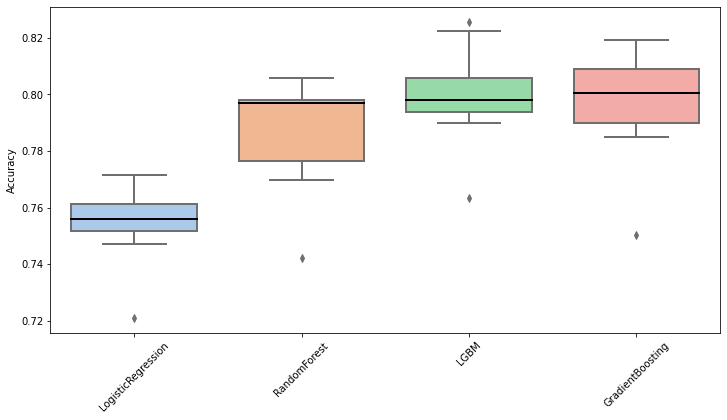

In [113]:
clf_scores = pd.DataFrame(
    {
        "RandomForest": rfc_scores,
        "LogisticRegression": lr_reg_scores,
        "LGBM": lgbm_scores,
        "GradientBoosting": gbc_scores,
    }
)

sorted_clfs = clf_scores.median().sort_values().index
clf_scores_sorted = clf_scores[sorted_clfs]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=clf_scores_sorted,
    palette="pastel",
    saturation=0.75,
    width=0.75,
    fliersize=5,
    linewidth=2,
    medianprops={"color": "black"},
)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show();


랜덤포레스트, lgbm, gbc만 튜닝하기로 결정

## Hyper parameter tuning

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal, uniform

In [116]:
param_dist = {
    "n_estimators": randint(100, 200),
    "learning_rate": reciprocal(0.001, 1.0),
    "max_depth": randint(5, 15),
    "max_leaf_nodes": randint(2, 12),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "min_impurity_decrease": uniform(0.001, 0.1),
    "n_iter_no_change": randint(5, 15),
    "max_features": randint(10, 16),
}

gbc_rnd_search = RandomizedSearchCV(
    gbc,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=23,
)
gbc_rnd_search.fit(X_train_robust, y_train.values.ravel());

In [117]:
param_dist = {
    "n_estimators": randint(100, 200),
    "max_depth": randint(5, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 8),
    "max_leaf_nodes": randint(100, 400),
    "min_impurity_decrease": uniform(1e-5, 1e-4),
}

rfc_rnd_search = RandomizedSearchCV(
    rfc,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=23,
)
rfc_rnd_search.fit(X_train_robust, y_train.values.ravel());

In [119]:
param_dist = {
    "num_leaves": randint(15, 30),
    "max_depth": randint(5, 15),
    "min_data_in_leaf": randint(100, 1000)
}

lgbm_rnd_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    cv=10,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy",
    random_state=23,
)
lgbm_rnd_search.fit(X_train_robust, y_train.values.ravel());

In [120]:
best_scores = (
    gbc_rnd_search.best_score_,
    rfc_rnd_search.best_score_,
    lgbm_rnd_search.best_score_,
)

best_classifiers = (
    gbc_rnd_search.best_estimator_,
    rfc_rnd_search.best_estimator_,
    lgbm_rnd_search.best_estimator_,
)

print("ACCURACY SCORE:", end="\n\n")
for best_clf, best_score in zip(best_classifiers, best_scores):
    print(f"Best {best_clf.__class__.__name__}:".ljust(35), f"{best_score:.6f}")

ACCURACY SCORE:

Best GradientBoostingClassifier:    0.804444
Best RandomForestClassifier:        0.802142
Best LGBMClassifier:                0.805098


In [121]:
print("BEST HYPERPARAMETERS:", "-" * 52, sep="\n")
for best_clf in (rfc_rnd_search, lgbm_rnd_search, gbc_rnd_search):
    print("Classifier".ljust(25), best_clf.best_estimator_.__class__.__name__)
    for hyperparam, value in best_clf.best_params_.items():
        print(f"{hyperparam.ljust(25)}", value)
    print("-" * 52)

BEST HYPERPARAMETERS:
----------------------------------------------------
Classifier                RandomForestClassifier
max_depth                 12
max_leaf_nodes            316
min_impurity_decrease     9.034809303848486e-05
min_samples_leaf          1
min_samples_split         5
n_estimators              109
----------------------------------------------------
Classifier                LGBMClassifier
max_depth                 11
min_data_in_leaf          181
num_leaves                15
----------------------------------------------------
Classifier                GradientBoostingClassifier
learning_rate             0.2401268512666616
max_depth                 9
max_features              15
max_leaf_nodes            6
min_impurity_decrease     0.07908527854686921
min_samples_leaf          6
min_samples_split         7
n_estimators              196
n_iter_no_change          8
----------------------------------------------------


가중치 저장

In [125]:
import joblib
rfc_rnd_search, lgbm_rnd_search, gbc_rnd_search
joblib.dump(rfc_rnd_search.best_estimator_, "/content/best_forest.pkl")
joblib.dump(lgbm_rnd_search.best_estimator_, "/content/best_lgbm.pkl")
joblib.dump(gbc_rnd_search.best_estimator_, "/content/best_gbc.pkl");

In [127]:
import joblib

best_forest = joblib.load("/content/best_forest.pkl")
best_lgbm = joblib.load("/content/best_lgbm.pkl")
best_gbc = joblib.load("/content/best_gbc.pkl")

In [149]:
test_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,14.410244,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,6,1,1,0,0,0,0,1
1,0,10.952902,0,-0.000000,1.496821,-0.000000,2.354215,-0.000000,5,1,1,0,0,0,0,1
2,1,16.037707,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2,1,0,1,0,1,0,0
3,0,18.762559,0,-0.000000,2.397146,-0.000000,2.157014,2.052248,2,1,0,1,0,0,0,1
4,0,11.402778,0,1.481742,-0.000000,1.982581,-0.000000,-0.000000,5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,17.223036,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,6,1,1,0,0,0,0,1
4273,0,20.260802,0,-0.000000,2.306388,1.559712,1.529278,1.948733,6,1,1,0,0,0,0,1
4274,1,15.091890,0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,3,0,0,0,1,1,0,0
4275,0,15.091890,0,-0.000000,2.366164,-0.000000,-0.000000,2.046191,3,0,0,1,0,0,0,1


In [150]:
robustScaler = RobustScaler().fit(test_df)
test_scaled = robustScaler.transform(test_df)

In [151]:
test_scaled

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.49539336,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.23319494,  0.        , ...,  1.        ,
         0.        , -1.        ],
       ...,
       [ 1.        ,  0.09767133,  0.        , ...,  1.        ,
         0.        , -1.        ],
       [ 0.        ,  0.09767133,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.89114065,  0.        , ...,  0.        ,
         1.        , -1.        ]])

In [145]:
test_label = pd.read_csv("/content/test.csv")
submit = test_label[["PassengerId"]]
submit

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [152]:
results = best_lgbm.predict(test_scaled)
submit["Transported"] = results
submit

<ipython-input-152-82b9e0a8083f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit["Transported"] = results


,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [154]:
submit["Transported"].replace({0:False,1:True},inplace=True)
submit

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [156]:
submit.to_csv("submit.csv", index = False)